# Before you begin

## Update your course repository

You need to clone the course repository to Nova. You probably already have cloned this, so you can skip this step.

```bash
git clone git@github.com:EEOB-BioData/BCB546_Spring2024.git
```

You will still need to pull new changes to this repository at the beginning of class. This will enable you to access new data files and scripts needed for in-class activities.

```bash
cd BCB546_Spring2024
git pull
```

Note that if you have modified any files in the repository, you will need to commit those changes before you can pull new changes. If you don't care about the changes, just delete and re-clone the repository.

## Start Jupyter notebook on Nova on demand.

You can start Jupyter notebook on Nova on demand. This will allow you to run Jupyter notebook on the server and access it from your local machine.

1. Go to the [Nova OnDemand](https://nova-ondemand.its.iastate.edu/) and login
2. Under the "Interactive Apps" tab, click on "Jupyter Notebook", request desired resources and click "Launch"
3. Wait for the job to start and click on the "Connect to Jupyter" button



# Getting Started

To begin, we need to import the necessary libraries.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Pandas working with TSV file

For this exercise, we will use a different version of the ecological dataset from our previous lessons. This version has only the complete observations, without missing entries for any of the columns. There are also a few additional columns providing information about the taxonomy of the species collected and the type of plot/enclosure.

In [2]:
file_path = '/work/LAS/mhufford-lab/arnstrm/EEOB546/BCB546_Spring2024/course-files/python/surveys_complete.csv'
surveys_complete = pd.read_csv(file_path, index_col=0)

In [3]:
sns.set(font_scale=1.5)
#sns.set_context("notebook", rc=viz_dict)
#sns.set_style("whitegrid")

## A Simple Scatterplot
Let’s start with a basic scatterplot. We’ll simply plot the weight on the horizontal axis and the hind foot length on the vertical axis. This uses the seaborn function .lmplot(). This function can take a Pandas DataFrame directly. It also will fit a regression line, by default. Since we may not want to visualize these data with a regression line, we will use the fit_reg=False argument.

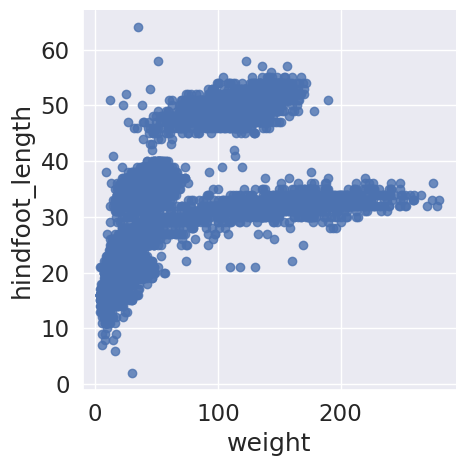

In [4]:
sns.lmplot(x="weight", y="hindfoot_length", data=surveys_complete, fit_reg=False);
plt.show()

Out of the box, seaborn will plot with a given set of aesthetics. We may want to change the label font size and make the background gray. For this, we can call the .set() method. If this method is called without any arguments, sns.set(), this will switch on the seaborn defaults, which changes the background color to gray and overlays white grid lines (i.e., a similar background to ggplot2 in R). We can add an argument to also change the font size for all of our downstream figures:

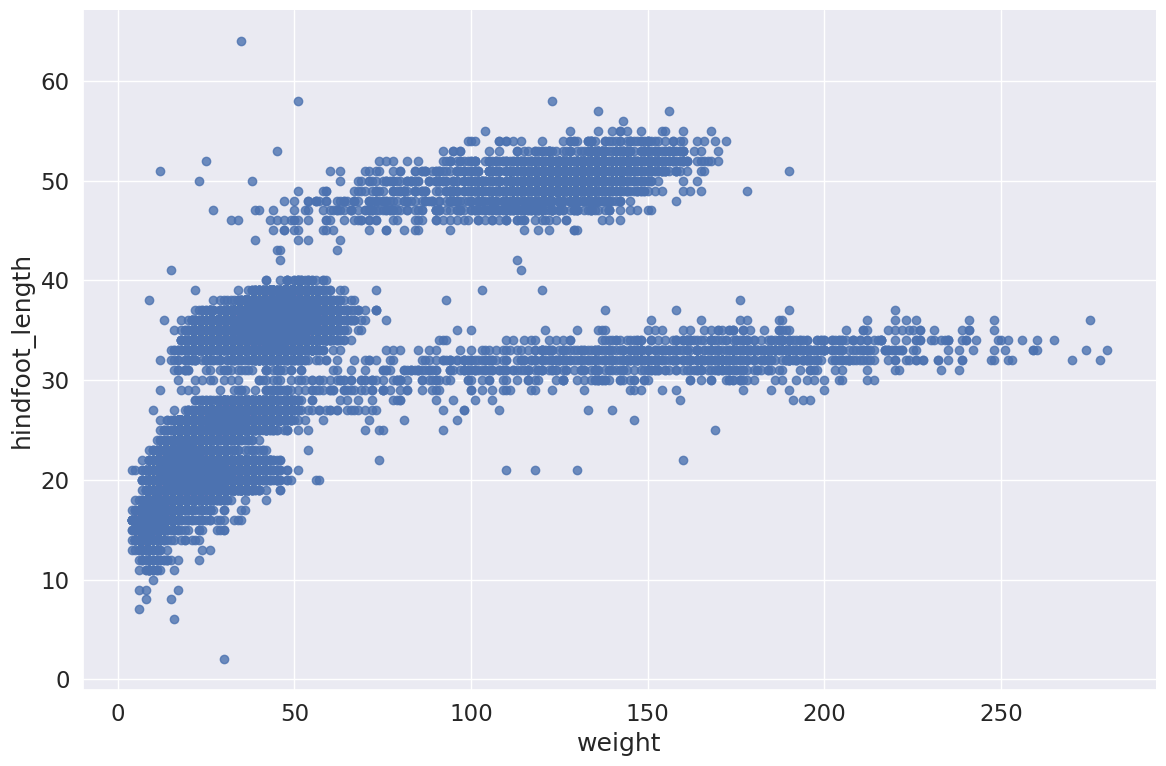

In [5]:
sns.lmplot(x="weight", y="hindfoot_length", data=surveys_complete, fit_reg=False, height=8, aspect=1.5);
plt.show()

The plot size is small, by default, and with seaborn, there isn’t a way to change the size of every plot with a single function. Further, this is done differently depending on the plot function we use because some functions return matplotlib objects and others are drawn using a grid object.

For .lmplot(), we can set the plot size directly as arguments in the function call using the size and aspect arguments. These arguments control the height and width of the object, respectively.

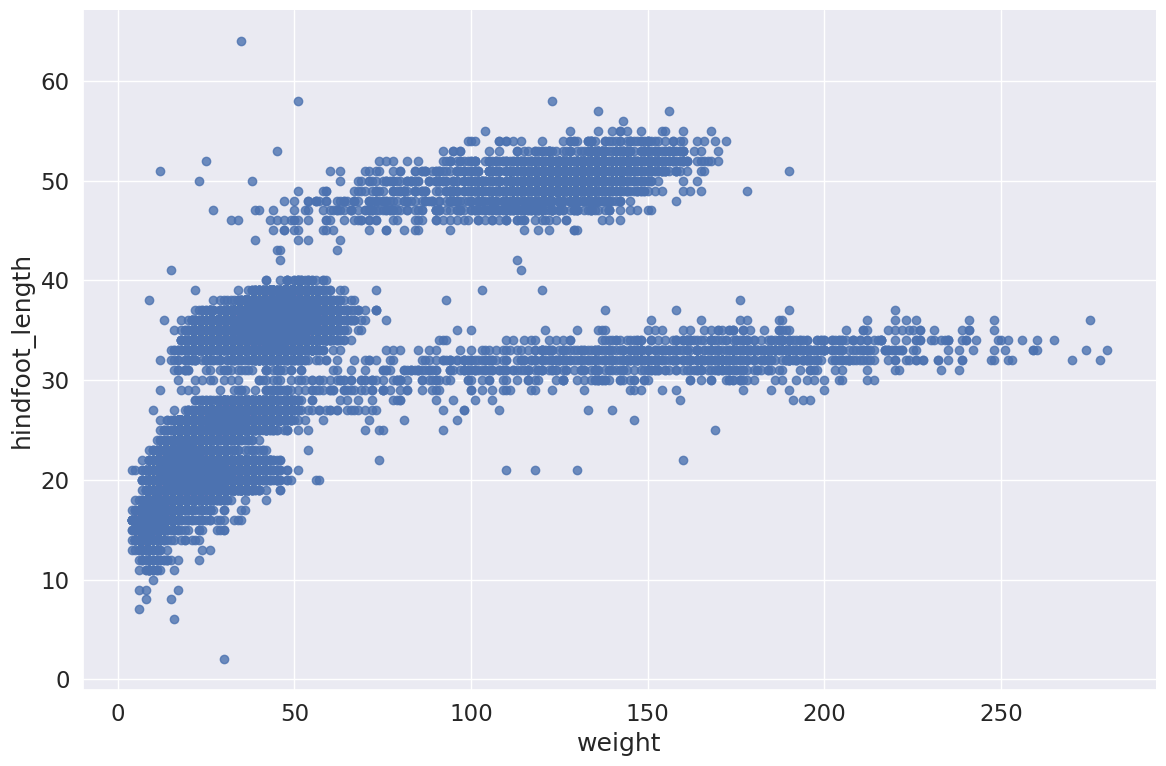

In [6]:
sns.lmplot(x="weight", y="hindfoot_length", data=surveys_complete, fit_reg=False, height=8, aspect=1.5)

## Changing marker aesthetics

One issue with this plot is that because we have a large dataset, it is difficult to adequately visualize the points on our graph. This is called “overplotting”. One way to avoid this is to change the size of the marker. Here we use the argument scatter_kws that takes a dictionary of keywords and values that are passed to the matplotlib scatter function.

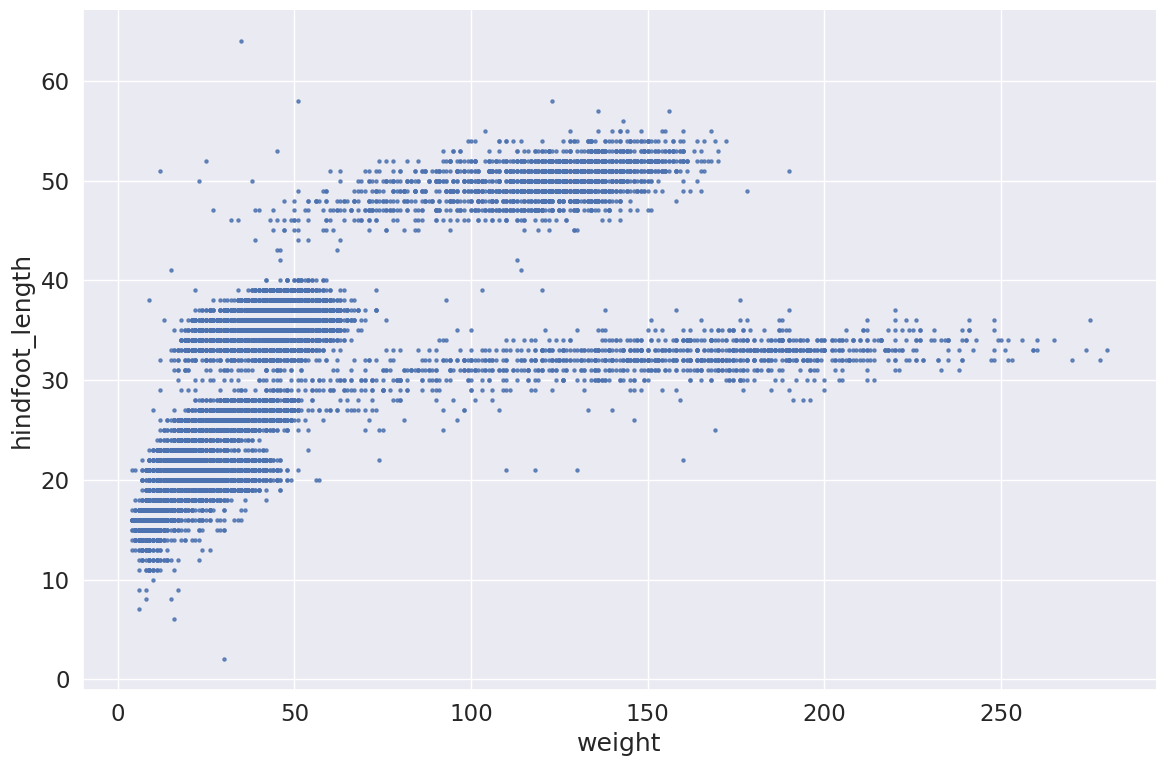

In [7]:
sns.lmplot(x="weight", y="hindfoot_length", data=surveys_complete, fit_reg=False, height=8, aspect=1.5, scatter_kws={"s": 5})

Another way to avoid overplotting is to use transparency so that regions of the plot with many points are darker. This is achieved using the scatter_kws argument and setting the alpha value. (This is using alpha compositing.)

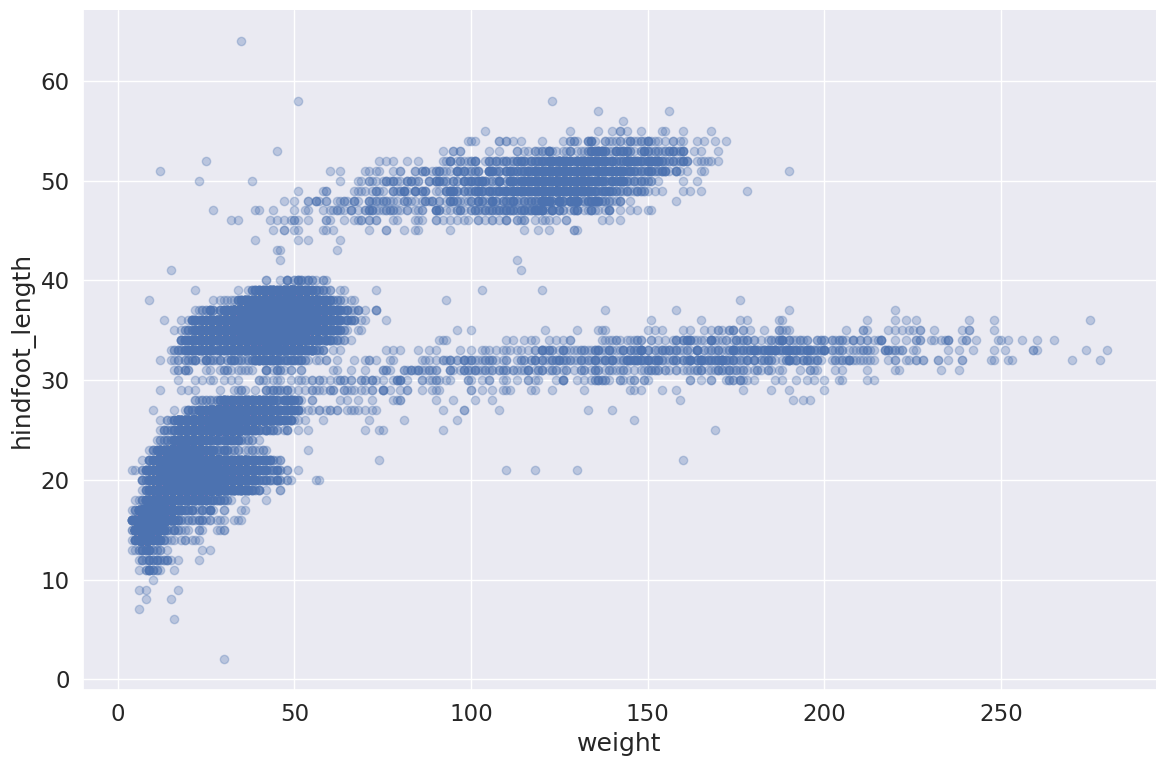

In [8]:
sns.lmplot(x="weight", y="hindfoot_length", data=surveys_complete, fit_reg=False, height=8, aspect=1.5, scatter_kws={'alpha':0.3})

## Coloring markers by a categorical value

We can also specify that the species_id labels indicate categories that determine a point’s color:

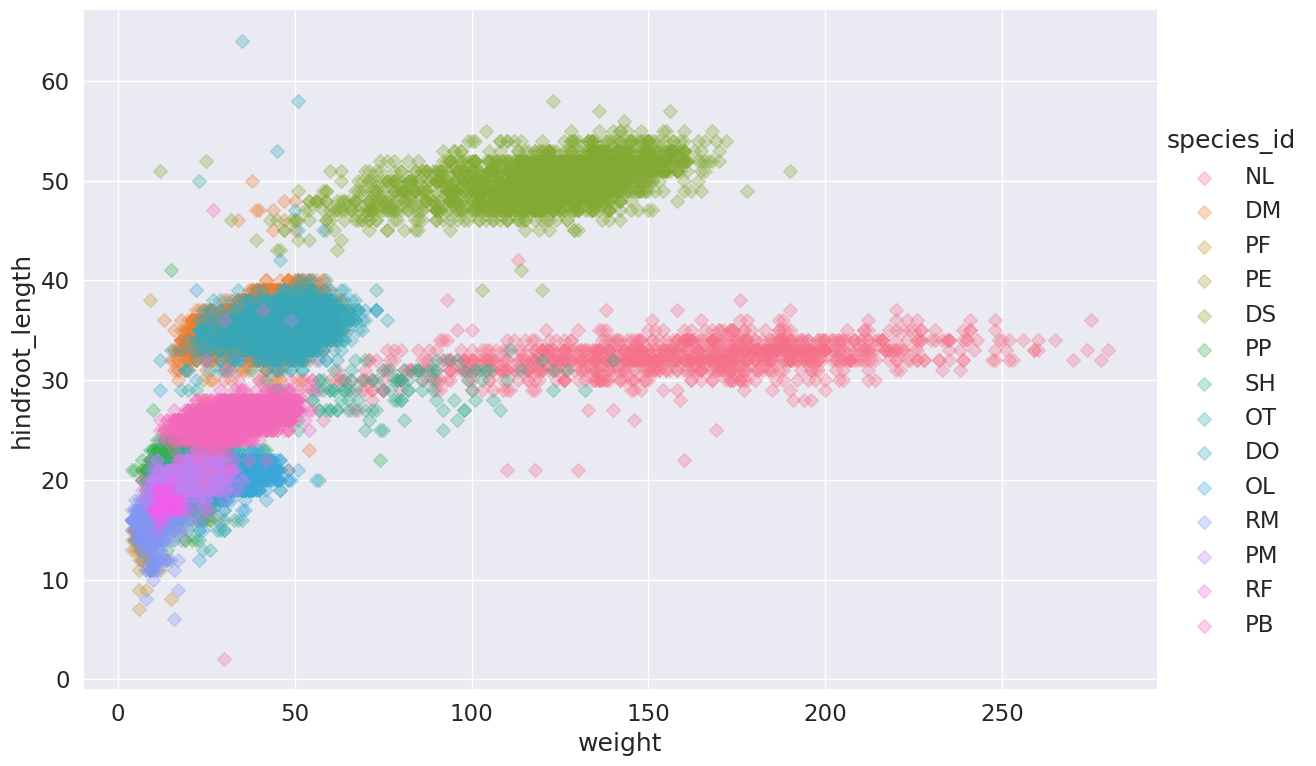

In [9]:
sns.lmplot(x="weight", y="hindfoot_length", data=surveys_complete, 
           fit_reg=False, height=8, aspect=1.5, scatter_kws={'alpha':0.3,"s": 50}, 
           hue='species_id', markers='D')

## Setting the axis labels

There are different ways to set figure properties using seaborn. For .lmplot(), we can create a figure variable and use a member method of that variable to set the axis labels.

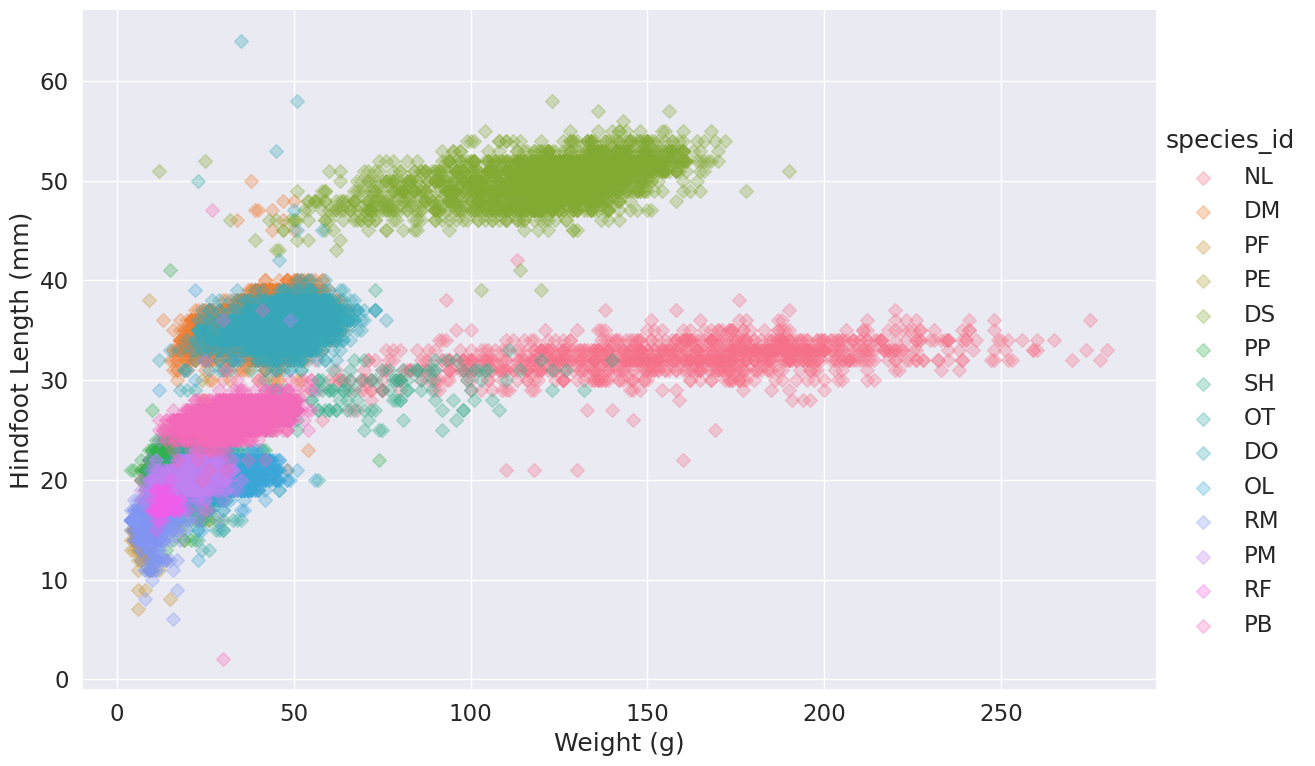

In [10]:
my_fig = sns.lmplot(x="weight", y="hindfoot_length", data=surveys_complete, 
                    fit_reg=False, height=8, aspect=1.5, 
                    scatter_kws={'alpha':0.3,"s": 50}, 
                    hue='species_id', markers='D')
my_fig.set_axis_labels('Weight (g)', 'Hindfoot Length (mm)')

# Box Plots & Violin Plots
We often like to compare the distributions of values across different categorical variables. Box plots and violin plots are often used to do this in a simple way.

In seaborn, both the .boxplot() and .violinplot() functions return matplotlib Axes objects. Thus, these plot functions do not have arguments for height and aspect like the scatter plot function above.

In order to change the size of these plots, we must create a matplotlib figure and axes and set the dimensions of the figure. First, let’s decide on the figure size we will use for the rest of our seaborn plots.

We can put these dimensions into a tuple variable called .

In [11]:
plot_dims = (14, 9)

Now, every time we create a new plot that returns a matplotlib Axes object, we can call the .subplots() function to change some of the aesthetics. Because of the iteritve way in which figures are built using matplotlib, we need to always execute our creation of the figure and the plot function in a single notebook cell.

In [ ]:
fig, ax = plt.subplots(figsize=plot_dims)
sns.boxplot(x='species_id', y='hindfoot_length', data=surveys_complete, hue='species_id')
ax.set(xlabel='Species ID', ylabel='Hindfoot Length (mm)')

Note that for the .boxplot() function, we can simply set the x and y values by giving the column names from our DataFrame. Then we must use the data=surveys_complete argument to indicate our DataFrame object.

Now let’s use a violin plot to visualize the weight data. For these data, we would also like the weight to be on the log10 scale. We will make this plot horizontal, so we’ll set the horizontal axis to be on the log scale. An easy way to do this is to create a new graph variable from our .violinplot() function and then call the .set_xscale() that is a member method of the graph variable.

In [ ]:
fig, ax = plt.subplots(figsize=plot_dims)
g = sns.violinplot(x='weight', y='species_id', data=surveys_complete, hue='species_id',
                   linewidth=0.2, orient="h", cut=0)
g.set_xscale('log', base=10)
ax.set(ylabel='Species ID', xlabel='Weight (g)')

# Histograms

Often, a histogram is a better way to visualize a distribution. This is relatively simple using seaborn’s .displot() function. This function does not take a Pandas DataFrame, but can take a Pandas Series (i.e., column in our DataFrame). This function also can take come other arguments like color, which takes values that specify the color of histogram based on matplotlib’s colors. We will make our plot cyan using the 'c' color code. Additionally, we will specify bins=50 so that our histogram is not plotted using too many or too few bins.

In [ ]:
sns.displot(surveys_complete['weight'], color='c',bins=50, 
            height=8, aspect=1.5)

By default, the .displot() function plots the density as a histogram, alternatively, you can plot a kernel density estimate by setting the kind argument to kind="kde" (the default is kind="hist") and removing the bins argument.

In [ ]:
sns.displot(surveys_complete['weight'], color='k', kind="kde", 
            height=8, aspect=1.5)

# Plotting with bokeh

Another library called bokeh can create amazing, interactive graphics using D3.js (javascript). This package is also easy to install with conda (you need to run this on nova)

```bash
conda activate notebook
conda install bokeh
```
Answer `y` to proceed with installation when prompted.

Return to your Jupyter notebook and restart. import the necessary bokeh plotting tools:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show

Here we are importing functions to create a figure and to output that figure to our Jupyter notebook.

We can now execute the output_notebook() function that will ensure that our Javascript images are displayed in our html notebook.

In [ ]:
output_notebook()

We can reproduce the histogram of the weights of all our observations.

In [ ]:
hist, edges = np.histogram(surveys_complete['weight'], density=True, bins=100)
my_fig = figure(title="Weight (g)",background_fill_color="#EBC8EB")
my_fig.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],fill_color="#036564", line_color="#033649")
show(my_fig)

We can also save this file as an html file that we can share with others or embed in files on the web. To do this, we need to include some other bokeh functions:

In [ ]:
from bokeh.resources import CDN
from bokeh.embed import file_html

And create an html object and save it to a file using standard Python file i/o:

In [ ]:
html = file_html(my_fig, CDN, "Weight Histogram")
out = open('weight_hist_bokeh.html','w')
out.write(html)
out.close()